In [300]:
import os
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

In [301]:

file=pd.read_excel("Merged files.xlsx",header=0)

In [302]:
file.head(3)

Datum i vrijeme  Plinomjer ist.zgrada 00062313Plin (m3)  \
0 2015-10-01 00:00:00                               3009985.0   
1 2015-10-01 01:00:00                               3009985.0   
2 2015-10-01 02:00:00                               3009985.0   

   Brojilo el.energije su 35649294El.energija VT (kWh)  \
0                                          371651.16     
1                                          371651.16     
2                                          371651.16     

   Brojilo el.energije su 35649294El.energija MT (kWh)  \
0                                          230421.12     
1                                          230427.44     
2                                          230433.52     

   Brojilo el.energije tr 35649314El.energija VT (kWh)  \
0                                          1225692.6     
1                                          1225692.6     
2                                          1225692.6     

   Brojilo el.energije tr 35649314El.energija MT (kWh)  \
0                                          1130192.8     
1                                          1130224.6     
2                                          1130256.4     

   Vodomjer stara 09249850Voda (m3)  Vodomjer nova 09249847Voda (m3)  \
0                               NaN                              NaN   
1                               NaN                              NaN   
2                               NaN                              NaN   

   Vodomjer hidrant 10058705Voda (m3)  \
0                                 NaN   
1                                 NaN   
2                                 NaN   

   Brojilo el.energije ko 46621646El.energija VT (kWh)  ...  \
0                                            67287.0    ...   
1                                            67287.0    ...   
2                                            67287.0    ...   

   Temp.senzor vanj.1 25000099Vlažnost (%)  \
0                                    80.24   
1                                    79.87   
2                                    83.93   

   Plinomjer zap.zgrada 20526377Plin (m3)  Sat  Dan u sedmici  Mjesec  Godina  \
0                                 85344.0    0              3      10    2015   
1                                 85344.0    1              3      10    2015   
2                                 85344.0    2              3      10    2015   

   Kvartal  Dan u godini  Dan u mjesecu  Sedmica  
0        4           274              1       40  
1        4           274              1       40  
2        4           274              1       40  

[3 rows x 57 columns]

In [303]:
file['Datum i vrijeme'] = pd.to_datetime(file['Datum i vrijeme'],yearfirst=True)

Koeficijent varijacije - odnos standardne devijacije i srednje vrijednosti

In [304]:
cv = lambda x: np.std(x, ddof=1) / np.mean(x) * 100 

In [305]:
cv_coef=file.iloc[:,1:].apply(cv)
cv_coef[cv_coef>1]

Plinomjer ist.zgrada 00062313Plin (m3)                  34.206510
Brojilo el.energije su 35649294El.energija VT (kWh)      8.449773
Brojilo el.energije su 35649294El.energija MT (kWh)     17.545680
Brojilo el.energije tr 35649314El.energija VT (kWh)      7.393956
Brojilo el.energije tr 35649314El.energija MT (kWh)      7.532478
Vodomjer stara 09249850Voda (m3)                         9.705396
Vodomjer nova 09249847Voda (m3)                          3.178553
Vodomjer hidrant 10058705Voda (m3)                       4.238277
Kalorimetar 1 39024788Topl.energija (MWh)               13.051205
Kalorimetar 1 39024788Kum.protok (m3)                   14.820566
Kalorimetar 1 39024788Tren.protok (m3/h)                96.375476
Kalorimetar 1 39024788Temp.pol.voda (°C)                41.352170
Kalorimetar 1 39024788Temp.pov.voda (°C)                35.695762
Kalorimetar 2 39024724Kum.protok (m3)                    9.254639
Kalorimetar 2 39024724Tren.protok (m3/h)               114.696383
Kalorimeta

In [306]:
#neinformativni podaci
file=file.drop(['Brojilo el.energije ko 46621646El.energija VT (kWh)', 'Brojilo el.energije ko 46621646El.energija MT (kWh)','Brojilo el.energije po 38878959El.energija VT (kWh)',
       'Brojilo el.energije po 38878959El.energija MT (kWh)',
       'Brojilo el.energije kl 46868995El.energija VT (kWh)',
       'Brojilo el.energije kl 46868995El.energija MT (kWh)', 'Kalorimetar 2 39024724Topl.energija (MWh)',"Kalorimetar 2 39024724Temp.pol.voda (°C)","Kalorimetar 2 39024724Temp.pov.voda (°C)"],axis=1)

In [307]:
len(file.columns)

48

In [308]:
#Merged files have been manually modified 
file["Sat"]=file["Datum i vrijeme"].dt.hour
file["Dan u sedmici"]=file["Datum i vrijeme"].dt.dayofweek
file["Mjesec"]=file["Datum i vrijeme"].dt.month
file["Godina"]=file["Datum i vrijeme"].dt.year
file['Kvartal'] =file['Datum i vrijeme'].dt.quarter
file['Dan u godini'] =file['Datum i vrijeme'].dt.dayofyear
file['Dan u mjesecu'] = file['Datum i vrijeme'].dt.day

In [309]:
file.describe()

Plinomjer ist.zgrada 00062313Plin (m3)  \
count                            1.501100e+04   
mean                             2.275794e+06   
std                              7.784697e+05   
min                              1.437329e+06   
25%                              1.491945e+06   
50%                              1.551177e+06   
75%                              3.060453e+06   
max                              3.101587e+06   

       Brojilo el.energije su 35649294El.energija VT (kWh)  \
count                                       15100.000000     
mean                                       445148.875238     
std                                         37614.071430     
min                                        371651.160000     
25%                                        409806.000000     
50%                                        459201.920000     
75%                                        478616.750000     
max                                        488964.480000     

       Brojilo el.energije su 35649294El.energija MT (kWh)  \
count                                       15100.000000     
mean                                       299817.484791     
std                                         52605.017168     
min                                        230421.120000     
25%                                        252412.040000     
50%                                        285592.840000     
75%                                        354019.410000     
max                                        392152.160000     

       Brojilo el.energije tr 35649314El.energija VT (kWh)  \
count                                       9.946000e+03     
mean                                        1.379927e+06     
std                                         1.020312e+05     
min                                         1.225693e+06     
25%                                         1.284950e+06     
50%                                         1.346584e+06     
75%                                         1.475481e+06     
max                                         1.541145e+06     

       Brojilo el.energije tr 35649314El.energija MT (kWh)  \
count                                       9.946000e+03     
mean                                        1.275332e+06     
std                                         9.606415e+04     
min                                         1.130193e+06     
25%                                         1.185719e+06     
50%                                         1.243895e+06     
75%                                         1.364575e+06     
max                                         1.426276e+06     

       Vodomjer stara 09249850Voda (m3)  Vodomjer nova 09249847Voda (m3)  \
count                      12302.000000                      6312.000000   
mean                       13832.345222                     17955.986526   
std                         1342.483840                       570.740568   
min                         1929.240000                     16910.290000   
25%                        12906.812500                     17453.385000   
50%                        13784.250000                     18087.295000   
75%                        15278.030000                     18469.977500   
max                        15287.430000                     18735.780000   

       Vodomjer hidrant 10058705Voda (m3)  \
count                         5578.000000   
mean                            12.277949   
std                              0.520373   
min                              0.000000   
25%                             12.300000   
50%                             12.300000   
75%                             12.300000   
max                             12.300000   

       Kalorimetar 1 39024788Topl.energija (MWh)  \
count                               15100.000000   
mean                                 1724.974511   
std                                   225.129956   
min                           

In [310]:
df= file.sort_values(by='Datum i vrijeme')

# Check time intervals
df['delta'] = df['Datum i vrijeme'] - df["Datum i vrijeme"].shift(1)

df[["Datum i vrijeme", 'delta']]

Datum i vrijeme             delta
0     2015-10-01 00:00:00               NaT
1     2015-10-01 01:00:00   0 days 01:00:00
2     2015-10-01 02:00:00   0 days 01:00:00
3     2015-10-01 03:00:00   0 days 01:00:00
4     2015-10-01 04:00:00   0 days 01:00:00
5     2015-10-01 05:00:00   0 days 01:00:00
6     2015-10-01 06:00:00   0 days 01:00:00
7     2015-10-01 07:00:00   0 days 01:00:00
8     2015-10-01 08:00:00   0 days 01:00:00
9     2015-10-01 09:00:00   0 days 01:00:00
10    2015-10-01 10:00:00   0 days 01:00:00
11    2015-10-01 11:00:00   0 days 01:00:00
12    2015-10-01 12:00:00   0 days 01:00:00
13    2015-10-01 13:00:00   0 days 01:00:00
14    2015-10-01 14:00:00   0 days 01:00:00
15    2015-10-01 15:00:00   0 days 01:00:00
16    2015-10-01 16:00:00   0 days 01:00:00
17    2015-10-01 17:00:00   0 days 01:00:00
18    2015-10-01 18:00:00   0 days 01:00:00
19    2015-10-01 19:00:00   0 days 01:00:00
20    2015-10-01 20:00:00   0 days 01:00:00
21    2015-10-01 21:00:00   0 days 01:00:00
22    2015-10-01 22:00:00   0 days 01:00:00
23    2015-10-01 23:00:00   0 days 01:00:00
24    2015-10-02 00:00:00   0 days 01:00:00
25    2015-10-02 01:00:00   0 days 01:00:00
26    2015-10-02 02:00:00   0 days 01:00:00
27    2015-10-02 03:00:00   0 days 01:00:00
28    2015-10-02 04:00:00   0 days 01:00:00
29    2015-10-02 05:00:00   0 days 01:00:00
30    2015-10-02 06:00:00   0 days 01:00:00
31    2015-10-02 07:00:00   0 days 01:00:00
32    2015-10-02 08:00:00   0 days 01:00:00
33    2015-10-02 09:00:00   0 days 01:00:00
34    2015-10-02 10:00:00   0 days 01:00:00
35    2015-10-02 11:00:00   0 days 01:00:00
36    2015-10-02 12:00:00   0 days 01:00:00
37    2015-10-02 13:00:00   0 days 01:00:00
38    2015-10-02 14:00:00   0 days 01:00:00
39    2015-10-02 15:00:00   0 days 01:00:00
40    2015-10-02 16:00:00   0 days 01:00:00
41    2015-10-02 17:00:00   0 days 01:00:00
42    2015-10-02 18:00:00   0 days 01:00:00
43    2015-10-02 19:00:00   0 days 01:00:00
44    2015-10-02 20:00:00   0 days 01:00:00
45    2015-10-02 21:00:00   0 days 01:00:00
46    2015-10-02 22:00:00   0 days 01:00:00
47    2015-10-02 23:00:00   0 days 01:00:00
48    2015-10-03 00:00:00   0 days 01:00:00
49    2015-10-03 01:00:00   0 days 01:00:00
50    2015-10-03 02:00:00   0 days 01:00:00
51    2015-10-03 03:00:00   0 days 01:00:00
52    2015-10-03 04:00:00   0 days 01:00:00
53    2015-10-03 05:00:00   0 days 01:00:00
54    2015-10-03 06:00:00   0 days 01:00:00
55    2015-10-03 07:00:00   0 days 01:00:00
56    2015-10-03 08:00:00   0 days 01:00:00
57    2015-10-03 09:00:00   0 days 01:00:00
58    2015-10-03 10:00:00   0 days 01:00:00
59    2015-10-03 11:00:00   0 days 01:00:00
60    2015-10-03 12:00:00   0 days 01:00:00
61    2015-10-03 13:00:00   0 days 01:00:00
62    2015-10-03 14:00:00   0 days 01:00:00
63    2015-10-03 15:00:00   0 days 01:00:00
64    2015-10-03 16:00:00   0 days 01:00:00
65    2015-10-03 17:00:00   0 days 01:00:00
66    2015-10-03 18:00:00   0 days 01:00:00
67    2015-10-03 19:00:00   0 days 01:00:00
68    2015-10-03 20:00:00   0 days 01:00:00
69    2015-10-03 21:00:00   0 days 01:00:00
70    2015-10-03 22:00:00   0 days 01:00:00
71    2015-10-03 23:00:00   0 days 01:00:00
72    2015-10-04 00:00:00   0 days 01:00:00
73    2015-10-04 01:00:00   0 days 01:00:00
74    2015-10-04 02:00:00   0 days 01:00:00
75    2015-10-04 03:00:00   0 days 01:00:00
76    2015-10-04 04:00:00   0 days 01:00:00
77    2015-10-04 05:00:00   0 days 01:00:00
78    2015-10-04 06:00:00   0 days 01:00:00
79    2015-10-04 07:00:00   0 days 01:00:00
80    2015-10-04 08:00:00   0 days 01:00:00
81    2015-10-04 09:00:00   0 days 01:00:00
82    2015-10-04 10:00:00   0 days 01:00:00
83    2015-10-04 11:00:00   0 days 01:00:00
84    2015-10-04 12:00:00   0 days 01:00:00
85    2015-10-04 13:00:00   0 days 01:00:00
86    2015-10-04 14:00:00   0 days 01:00:00
87    2015-10-04 15:00:00   0 days 01:00:00
88    2015-10-04 16:00:00   0 days 01:00:00
89    2015-10-04 17:00:00   0 days 01:00:00
90    

In [311]:
df.loc[(df["delta"]!="0 days 01:00:00")]

Datum i vrijeme  Plinomjer ist.zgrada 00062313Plin (m3)  \
0          2015-10-01                               3009985.0   
1104       2015-11-17                               3017519.0   
2496       2016-01-21                               3042893.0   
5136       2016-09-30                               3068161.0   
10111      2017-10-01                               1481263.0   
14719      2018-04-12                               1550707.0   

       Brojilo el.energije su 35649294El.energija VT (kWh)  \
0                                              371651.16     
1104                                           380877.80     
2496                                           398985.32     
5136                                           437223.96     
10111                                          475356.12     
14719                                          488198.32     

       Brojilo el.energije su 35649294El.energija MT (kWh)  \
0                                              230421.12     
1104                                           235344.92     
2496                                           245492.24     
5136                                           268941.92     
10111                                          340881.84     
14719                                          388893.64     

       Brojilo el.energije tr 35649314El.energija VT (kWh)  \
0                                              1225692.6     
1104                                           1249761.2     
2496                                           1289661.4     
5136                                           1414118.6     
10111                                                NaN     
14719                                                NaN     

       Brojilo el.energije tr 35649314El.energija MT (kWh)  \
0                                              1130192.8     
1104                                           1152998.8     
2496                                           1189839.6     
5136                                           1308026.8     
10111                                                NaN     
14719                                                NaN     

       Vodomjer stara 09249850Voda (m3)  Vodomjer nova 09249847Voda (m3)  \
0                                   NaN                              NaN   
1104                                NaN                              NaN   
2496                                NaN                              NaN   
5136                           12716.21                         17997.74   
10111                          14874.17                              NaN   
14719                          15287.43                              NaN   

       Vodomjer hidrant 10058705Voda (m3)  \
0                                     NaN   
1104                                  NaN   
2496                                  NaN   
5136                                 12.3   
10111                                 NaN   
14719                                 NaN   

       Kalorimetar 1 39024788Topl.energija (MWh)  ...  \
0                                        1349.61  ...   
1104                                     1388.24  ...   
2496                                     1491.23  ...   
5136                                     1583.84  ...   
10111                                    1852.58  ...   
14719                                    2120.57  ...   

       Plinomjer zap.zgrada 20526377Plin (m3)  Sat  Dan u sedmici  Mjesec  \
0                                     85344.0    0              3      10   
1104                                  88930.0    0              1      11   
2496                                  98449.0    0              3       1   
5136                                 107054.0    0              4       9   
10111                                105156.0    0              6      10   
14719                                129949.0    0              3       4   

       Godina  Kvarta

In [312]:
file.isna().sum()

Datum i vrijeme                                           0
Plinomjer ist.zgrada 00062313Plin (m3)                  116
Brojilo el.energije su 35649294El.energija VT (kWh)      27
Brojilo el.energije su 35649294El.energija MT (kWh)      27
Brojilo el.energije tr 35649314El.energija VT (kWh)    5181
Brojilo el.energije tr 35649314El.energija MT (kWh)    5181
Vodomjer stara 09249850Voda (m3)                       2825
Vodomjer nova 09249847Voda (m3)                        8815
Vodomjer hidrant 10058705Voda (m3)                     9549
Kalorimetar 1 39024788Topl.energija (MWh)                27
Kalorimetar 1 39024788Kum.protok (m3)                    27
Kalorimetar 1 39024788Tren.protok (m3/h)                 27
Kalorimetar 1 39024788Temp.pol.voda (°C)                 27
Kalorimetar 1 39024788Temp.pov.voda (°C)                 27
Kalorimetar 2 39024724Kum.protok (m3)                    27
Kalorimetar 2 39024724Tren.protok (m3/h)                 27
Kalorimetar 3 39024787Topl.energija (MWh

In [313]:
def plot_missing_values(dataset,column_name):
    f,ax=plt.subplots(nrows=1,ncols=3,figsize=(15,7))
    old_values=file[column_name].copy()
    file[column_name] = file[column_name].replace(0, np.nan)

    sns.lineplot(x=file['Datum i vrijeme'], y=old_values, ax=ax[0], color='darkorange', label='original')
    sns.lineplot(x=file['Datum i vrijeme'], y=file[column_name].fillna(np.inf),ax=ax[0], color='dodgerblue', label='modified')
    ax[0].set_title(column_name, fontsize=12)
    ax[0].set_ylabel(ylabel=column_name, fontsize=12)
    ax[0].set_xlim(file["Datum i vrijeme"].loc[(file["Datum i vrijeme"]=='10/01/2015  00:00:00 AM')],file["Datum i vrijeme"].loc[(file["Datum i vrijeme"]=='05/09/2016  11:00:00 PM')])


    sns.lineplot(x=file['Datum i vrijeme'], y=old_values, ax=ax[1], color='darkorange', label='original')
    sns.lineplot(x=file['Datum i vrijeme'], y=file[column_name].fillna(np.inf), ax=ax[1], color='dodgerblue', label='modified')
    ax[1].set_title(column_name, fontsize=12)
    ax[1].set_ylabel(ylabel=column_name, fontsize=12)
    ax[1].set_xlim(file['Datum i vrijeme'].loc[(file["Datum i vrijeme"]=='09/30/2016  00:00:00 AM')],file["Datum i vrijeme"].loc[(file["Datum i vrijeme"]=='04/25/2017  06:00:00 AM')])

    sns.lineplot(x=file['Datum i vrijeme'], y=old_values, ax=ax[2], color='darkorange', label='original')
    sns.lineplot(x=file['Datum i vrijeme'], y=file[column_name].fillna(np.inf), ax=ax[2], color='dodgerblue', label='modified')
    ax[2].set_title(column_name, fontsize=12)
    ax[2].set_ylabel(ylabel=column_name, fontsize=12)
    ax[2].set_xlim(file["Datum i vrijeme"].loc[(file["Datum i vrijeme"]=='10/01/2017  00:00:00 AM')],file["Datum i vrijeme"].loc[(file["Datum i vrijeme"]=='28/04/2018  11:00:00 PM')])
    plt.show()
    

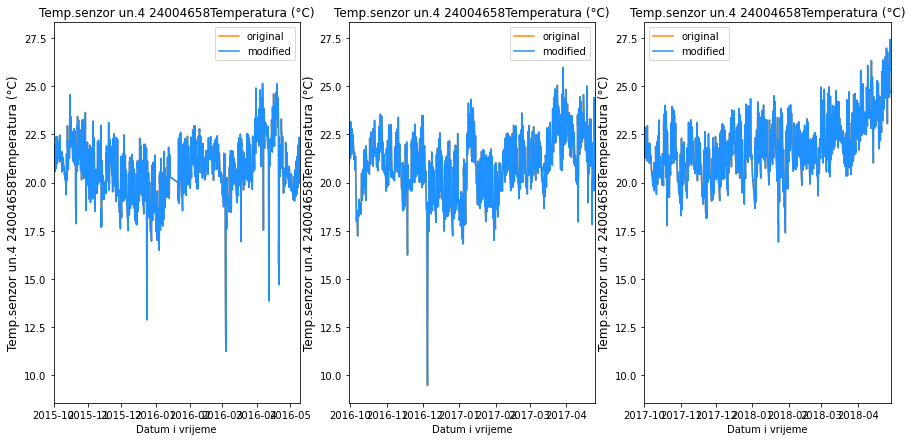

In [314]:
plot_missing_values(file,"Temp.senzor un.4 24004658Temperatura (°C)")

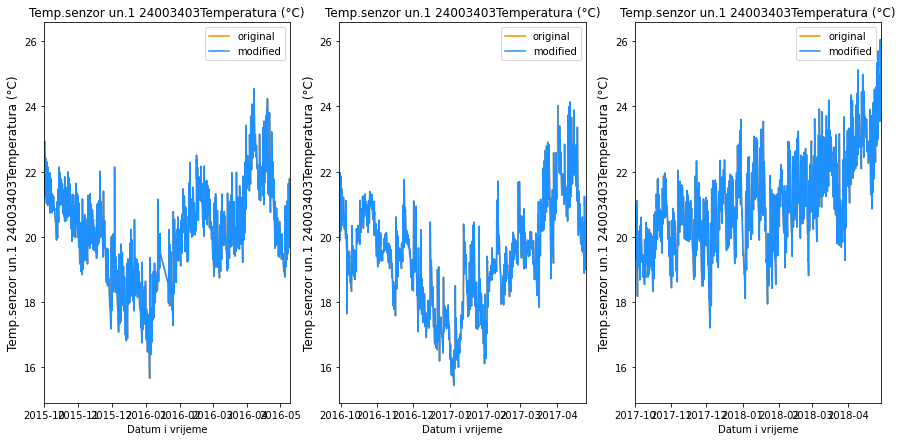

In [315]:
plot_missing_values(file,"Temp.senzor un.1 24003403Temperatura (°C)")

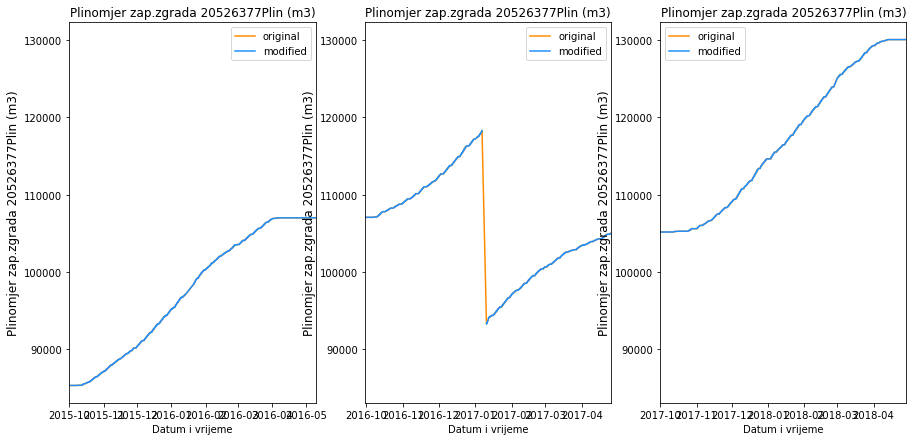

In [316]:
plot_missing_values(file,"Plinomjer zap.zgrada 20526377Plin (m3)")

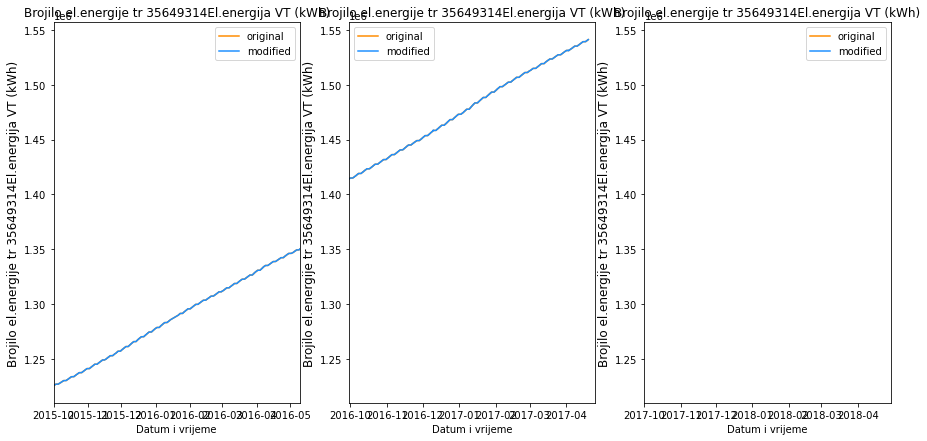

In [317]:
plot_missing_values(file,"Brojilo el.energije tr 35649314El.energija VT (kWh)")

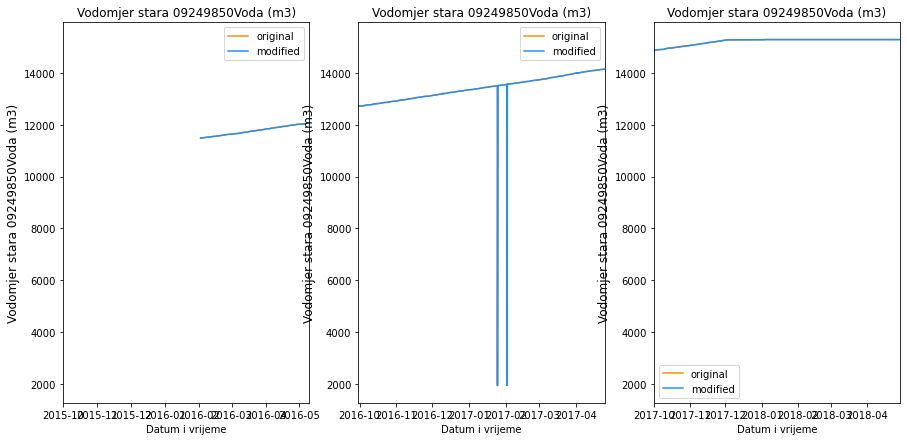

In [318]:
plot_missing_values(file,"Vodomjer stara 09249850Voda (m3)")

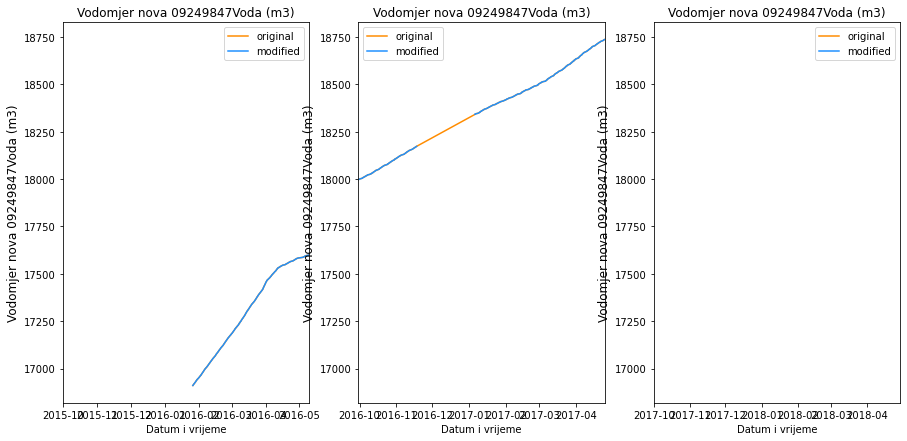

In [319]:
plot_missing_values(file,"Vodomjer nova 09249847Voda (m3)")

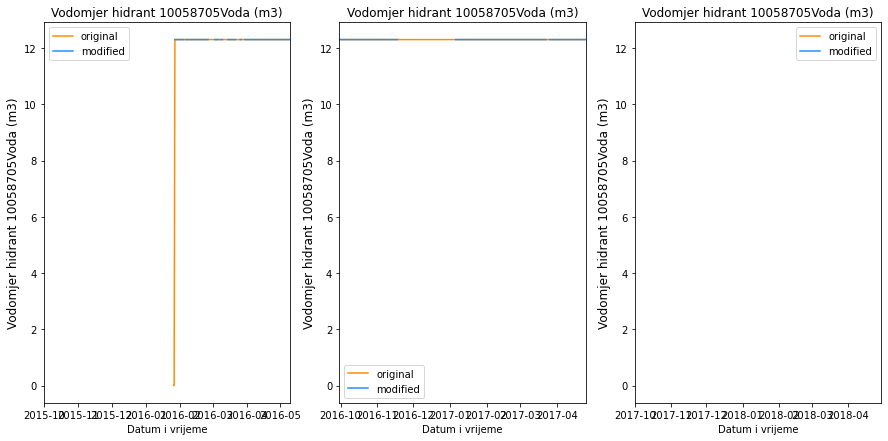

In [320]:
plot_missing_values(file,"Vodomjer hidrant 10058705Voda (m3)")

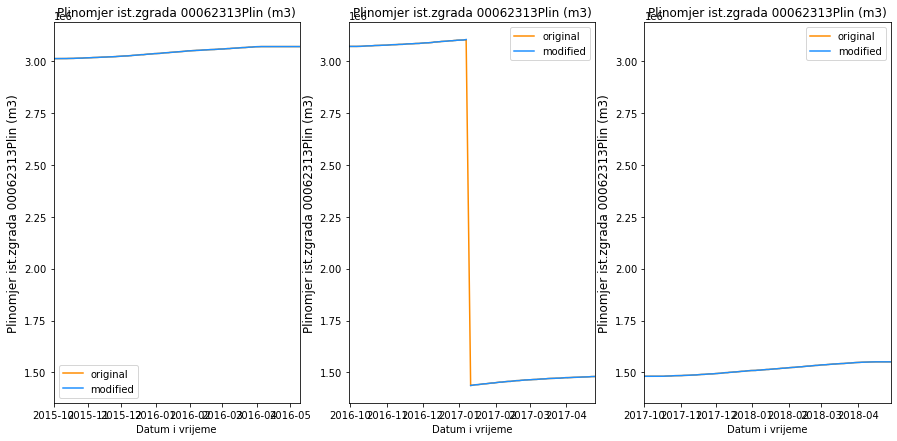

In [321]:
plot_missing_values(file,"Plinomjer ist.zgrada 00062313Plin (m3)")

In [322]:
file=file.drop(["Brojilo el.energije tr 35649314El.energija VT (kWh)","Brojilo el.energije tr 35649314El.energija MT (kWh)",
               "Vodomjer stara 09249850Voda (m3)","Vodomjer nova 09249847Voda (m3)","Vodomjer hidrant 10058705Voda (m3)"],axis=1)

In [323]:
file=file.sort_values(by=["Godina","Dan u godini","Sat"])

In [324]:
file["Temp sr_K1"]=(file['Kalorimetar 1 39024788Temp.pol.voda (°C)']+file['Kalorimetar 1 39024788Temp.pov.voda (°C)'])/2
file["Temp sr_K3"]=(file['Kalorimetar 3 39024787Temp.pol.voda (°C)']+file['Kalorimetar 3 39024787Temp.pol.voda (°C)'])/2

In [325]:
def heat(val):
    if val>=40:
        return 1
    else: 
        return 0

In [326]:
file["Grijanje_K1"]=list(map(heat,file["Temp sr_K1"].values))
file["Grijanje_K3"]=list(map(heat,file["Temp sr_K3"].values))

In [327]:
aa=file.groupby(["Godina","Dan u godini"], axis=0)

In [328]:
values_tot=[]
for name,group in aa:

    values=[-1]*len(aa.get_group(name))
    if aa.get_group(name)["Grijanje_K1"].empty==False:
        b=np.argwhere(aa.get_group(name)["Grijanje_K1"].values==1)
        enum=list(enumerate(b))
        for k,val in enumerate(b):
            values[val[0]]=enum[k][0]  
    else:pass
    values_tot.append(values)

In [329]:
file["Broj sati grijanja_K1"]=np.concatenate(values_tot)

In [330]:
values_tot=[]
for name,group in aa:

    values=[-1]*len(aa.get_group(name))
    if aa.get_group(name)["Grijanje_K3"].empty==False:
        b=np.argwhere(aa.get_group(name)["Grijanje_K3"].values==1)
        enum=list(enumerate(b))
        for k,val in enumerate(b):
            values[val[0]]=enum[k][0]  
    else:pass
    values_tot.append(values)

In [331]:
file["Broj sati grijanja_K3"]=np.concatenate(values_tot)

In [332]:
values_xbefore=[]
values_xafter=[]
for name,group in aa:
    values_before=[None]*len(aa.get_group(name))
    values_after=[None]*len(aa.get_group(name))
    if aa.get_group(name)["Grijanje_K1"].empty==False:
        
        b=np.argwhere(aa.get_group(name)["Grijanje_K1"].values)
        if b.size==0:
            values_before=values_before
            values_after=values_after
        else:
            values_before[b[0][0]]=b[0][0]
            values_after[b[-1][0]]=24-b[-1][0]
        
    values_xbefore.append(values_before)
    values_xafter.append(values_after)

In [333]:
val_xbefore=np.concatenate(values_xbefore)
val_xafter=np.concatenate(values_xafter)

In [334]:
file["Negrijano_K1_prije"]=np.concatenate(values_xbefore)
file["Negrijano_K1_poslije"]=np.concatenate(values_xafter)

In [335]:
values_xbefore=[]
values_xafter=[]
for name,group in aa:
    values_before=[None]*len(aa.get_group(name))
    values_after=[None]*len(aa.get_group(name))
    if aa.get_group(name)["Grijanje_K3"].empty==False:
        
        b=np.argwhere(aa.get_group(name)["Grijanje_K3"].values)
        if b.size==0:
            values_before=values_before
            values_after=values_after
        else:
            values_before[b[0][0]]=b[0][0]
            values_after[b[-1][0]]=24-b[-1][0]
        
    values_xbefore.append(values_before)
    values_xafter.append(values_after)

In [336]:
val_xbefore=np.concatenate(values_xbefore)
val_xafter=np.concatenate(values_xafter)

In [337]:
file["Negrijano_K3_prije"]=np.concatenate(values_xbefore)
file["Negrijano_K3_poslije"]=np.concatenate(values_xafter)

In [338]:
bb=file.groupby(["Godina","Mjesec","Dan u mjesecu"], axis=0)

In [339]:
start_date_s1=file[file["Datum i vrijeme"]=='10/01/2015  00:00:00 AM'].index.values
end_date_s1=file[file["Datum i vrijeme"]=='05/09/2016  11:00:00 PM'].index.values
start_date_s2=file[file["Datum i vrijeme"]=='09/30/2016  00:00:00 AM'].index.values
end_date_s2=file[file["Datum i vrijeme"]=='04/25/2017  06:00:00 AM'].index.values
start_date_s3=file[file["Datum i vrijeme"]=='10/01/2017  00:00:00 AM'].index.values


In [340]:
S1=file.loc[start_date_s1[0]:end_date_s1[0]]
S2=file.loc[start_date_s2[0]:end_date_s2[0]]
S3=file.loc[start_date_s3[0]:]
print("Length of S1:", len(S1))
print("Length of S1:" ,len(S2))
print("Length of S1:" ,len(S3))

Length of S1: 5136
Length of S1: 4975
Length of S1: 5016


In [341]:
values_1=[None]*len(S1["Negrijano_K1_prije"].values)
values_1[0]=-2
num_before=np.argwhere(S1["Negrijano_K1_prije"].values)
num_after=np.argwhere(S1["Negrijano_K1_poslije"].values)
values_1[1:]=[num_before[val][0]-num_after[val-1][0] for val in range(1,len(num_before))]

values_2=[None]*len(S2["Negrijano_K1_prije"].values)
values_2[0]=-2
num_before=np.argwhere(S2["Negrijano_K1_prije"].values)
num_after=np.argwhere(S2["Negrijano_K1_poslije"].values)
values_2[1:]=[num_before[val][0]-num_after[val-1][0] for val in range(1,len(num_before))]

values_3=[None]*len(S3["Negrijano_K1_prije"].values)
values_3[0]=-2#pocetak sezone
num_before=np.argwhere(S3["Negrijano_K1_prije"].values)
num_after=np.argwhere(S3["Negrijano_K1_poslije"].values)
values_3[1:]=[num_before[val][0]-num_after[val-1][0] for val in range(1,len(num_before))]

In [342]:
val_unheat=np.concatenate([values_1,values_2,values_3])

In [343]:
file["Negrijano_K1"]=np.empty(len(file["Negrijano_K1_prije"].values))
for val,k in list(enumerate(np.argwhere(file["Negrijano_K1_prije"].values))):
    file["Negrijano_K1"].values[[k][0]]=val_unheat[val]

In [344]:
values_1=[None]*len(S1["Negrijano_K3_prije"].values)
values_1[0]=-2
num_before=np.argwhere(S1["Negrijano_K3_prije"].values)
num_after=np.argwhere(S1["Negrijano_K3_poslije"].values)
values_1[1:]=[num_before[val][0]-num_after[val-1][0] for val in range(1,len(num_before))]

values_2=[None]*len(S2["Negrijano_K3_prije"].values)
values_2[0]=-2
num_before=np.argwhere(S2["Negrijano_K3_prije"].values)
num_after=np.argwhere(S2["Negrijano_K3_poslije"].values)
values_2[1:]=[num_before[val][0]-num_after[val-1][0] for val in range(1,len(num_before))]

values_3=[None]*len(S3["Negrijano_K3_prije"].values)
values_3[0]=-2#pocetak sezone
num_before=np.argwhere(S3["Negrijano_K3_prije"].values)
num_after=np.argwhere(S3["Negrijano_K3_poslije"].values)
values_3[1:]=[num_before[val][0]-num_after[val-1][0] for val in range(1,len(num_before))]

In [345]:
val_unheat=np.concatenate([values_1,values_2,values_3])

In [346]:
file["Negrijano_K3"]=np.empty(len(file["Negrijano_K3_prije"].values))
for val,k in list(enumerate(np.argwhere(file["Negrijano_K3_prije"].values))):
    file["Negrijano_K3"].values[[k][0]]=val_unheat[val]

In [347]:
file[["Temp sr_K1","Temp sr_K3"]]=file[["Temp sr_K1","Temp sr_K3"]].fillna(0)

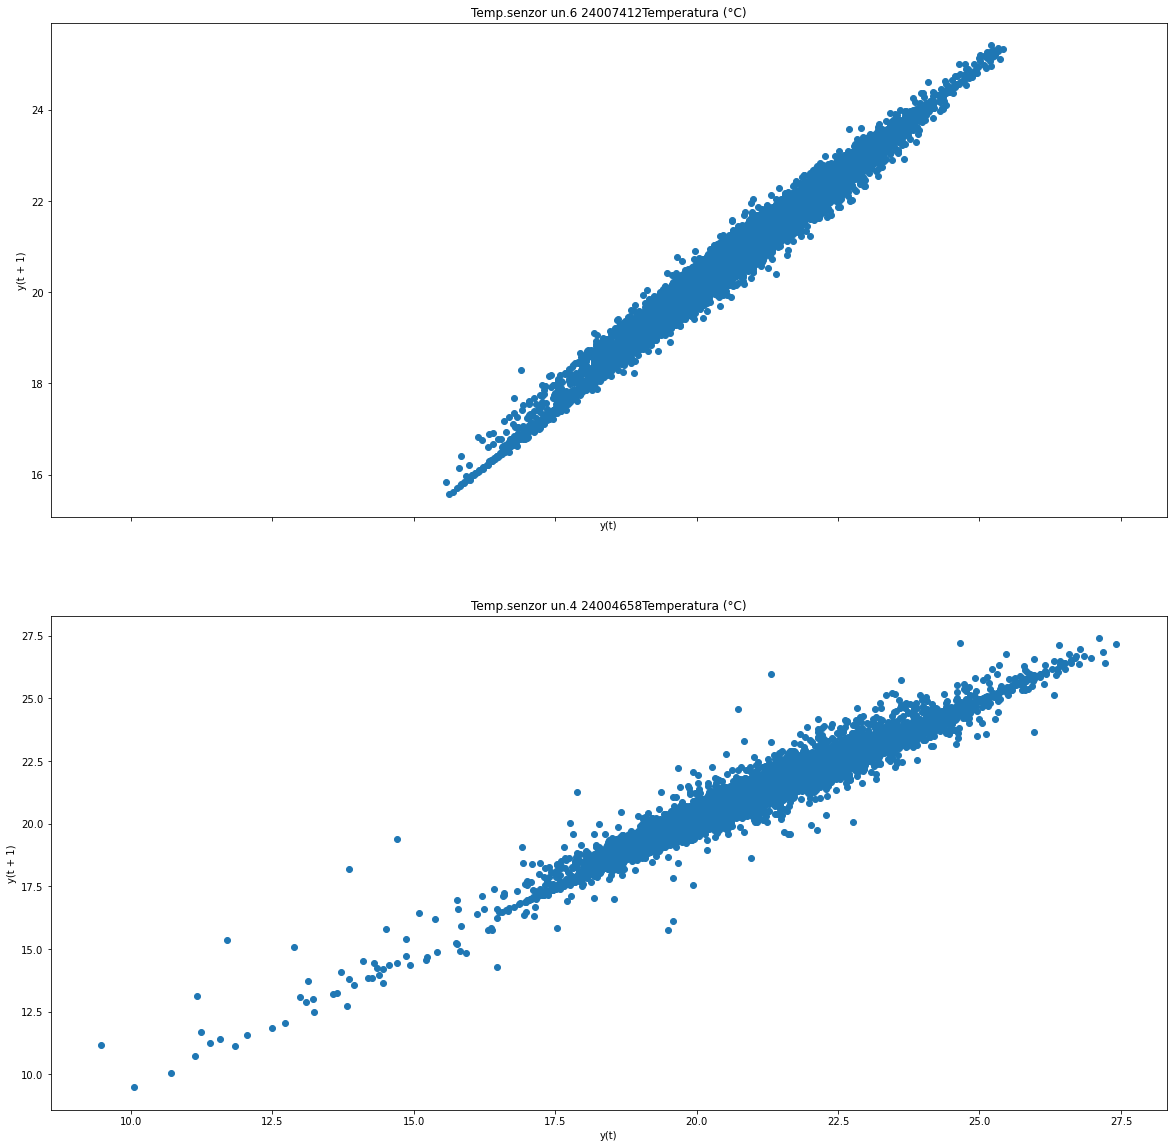

In [348]:
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import lag_plot
fig, ax = plt.subplots(ncols=1, nrows=2, sharex=True, figsize=(20,20))
series = ['Temp.senzor un.6 24007412Temperatura (°C)','Temp.senzor un.4 24004658Temperatura (°C)']
for i,col in enumerate(series):
    
    lag_plot(file[col],ax=ax[i])
    ax[i].set_title(col)
pyplot.show()

Correlation is a measure of the linear relationship of 2 or more variables. Through correlation, we can predict one variable from the other. The logic behind using correlation for feature selection is that the good variables are highly correlated with the target. Furthermore, variables should be correlated with the target but should be uncorrelated among themselves.

If two variables are correlated, we can predict one from the other. Therefore, if two features are correlated, the model only really needs one of them, as the second one does not add additional information. We will use the Pearson Correlation here.
If we find that the predictor variables are correlated among themselves, we can drop the variable which has a lower correlation coefficient value with the target variable. We can also compute multiple correlation coefficients to check whether more than two variables are correlated to each other. This phenomenon is known as multicollinearity.

In [349]:
correlations=file.corr()

In [368]:
pd.set_option('display.max_rows', None)
print(correlations['Temp.senzor un.4 24004658Temperatura (°C)'].where(np.abs(correlations['Temp.senzor un.4 24004658Temperatura (°C)'])>=0.30))

Plinomjer ist.zgrada 00062313Plin (m3)                -0.337714
Brojilo el.energije su 35649294El.energija VT (kWh)    0.305407
Brojilo el.energije su 35649294El.energija MT (kWh)    0.394197
Kalorimetar 1 39024788Topl.energija (MWh)              0.407721
Kalorimetar 1 39024788Kum.protok (m3)                  0.421521
Kalorimetar 1 39024788Tren.protok (m3/h)                    NaN
Kalorimetar 1 39024788Temp.pol.voda (°C)                    NaN
Kalorimetar 1 39024788Temp.pov.voda (°C)               0.345457
Kalorimetar 2 39024724Kum.protok (m3)                  0.417436
Kalorimetar 2 39024724Tren.protok (m3/h)                    NaN
Kalorimetar 3 39024787Topl.energija (MWh)              0.408855
Kalorimetar 3 39024787Kum.protok (m3)                  0.396126
Kalorimetar 3 39024787Tren.protok (m3/h)                    NaN
Kalorimetar 3 39024787Temp.pol.voda (°C)               0.314312
Kalorimetar 3 39024787Temp.pov.voda (°C)               0.339626
Temp.senzor un.1 24003403Temperatura (°C

In [369]:
file2=file[correlations.columns[np.abs(correlations['Temp.senzor un.4 24004658Temperatura (°C)'])>=0.30]]
#file2=file2.drop(['Brojilo el.energije su 35649294El.energija MT (kWh)',
       #'Kalorimetar 1 39024788Topl.energija (MWh)','Kalorimetar 1 39024788Kum.protok (m3)','Kalorimetar 2 39024724Kum.protok (m3)',
       #'Kalorimetar 3 39024787Topl.energija (MWh)','Kalorimetar 3 39024787Kum.protok (m3)',
      # 'Temp.senzor un.1 24003403Temperatura (°C)','Temp.senzor un.2 24004659Temperatura (°C)',
      # 'Temp.senzor un.3 24003393Temperatura (°C)','Temp.senzor un.4 24004658Temperatura (°C)','Temp.senzor un.5 24007590Temperatura (°C)',
       #'Temp.senzor un.6 24007412Temperatura (°C)','Temp.senzor un.7 24007548Temperatura (°C)',
      # 'Temp.senzor un.8 24007403Temperatura (°C)','Temp.senzor vanj.1 25000099Temperatura (°C)'],axis=1)

In [370]:
file2.columns

Index(['Plinomjer ist.zgrada 00062313Plin (m3)',
       'Brojilo el.energije su 35649294El.energija VT (kWh)',
       'Brojilo el.energije su 35649294El.energija MT (kWh)',
       'Kalorimetar 1 39024788Topl.energija (MWh)',
       'Kalorimetar 1 39024788Kum.protok (m3)',
       'Kalorimetar 1 39024788Temp.pov.voda (°C)',
       'Kalorimetar 2 39024724Kum.protok (m3)',
       'Kalorimetar 3 39024787Topl.energija (MWh)',
       'Kalorimetar 3 39024787Kum.protok (m3)',
       'Kalorimetar 3 39024787Temp.pol.voda (°C)',
       'Kalorimetar 3 39024787Temp.pov.voda (°C)',
       'Temp.senzor un.1 24003403Temperatura (°C)',
       'Temp.senzor un.2 24004659Temperatura (°C)',
       'Temp.senzor un.3 24003393Temperatura (°C)',
       'Temp.senzor un.4 24004658Temperatura (°C)',
       'Temp.senzor un.5 24007590Temperatura (°C)',
       'Temp.senzor un.6 24007412Temperatura (°C)',
       'Temp.senzor un.7 24007548Temperatura (°C)',
       'Temp.senzor un.8 24007403Temperatura (°C)',
       'Te

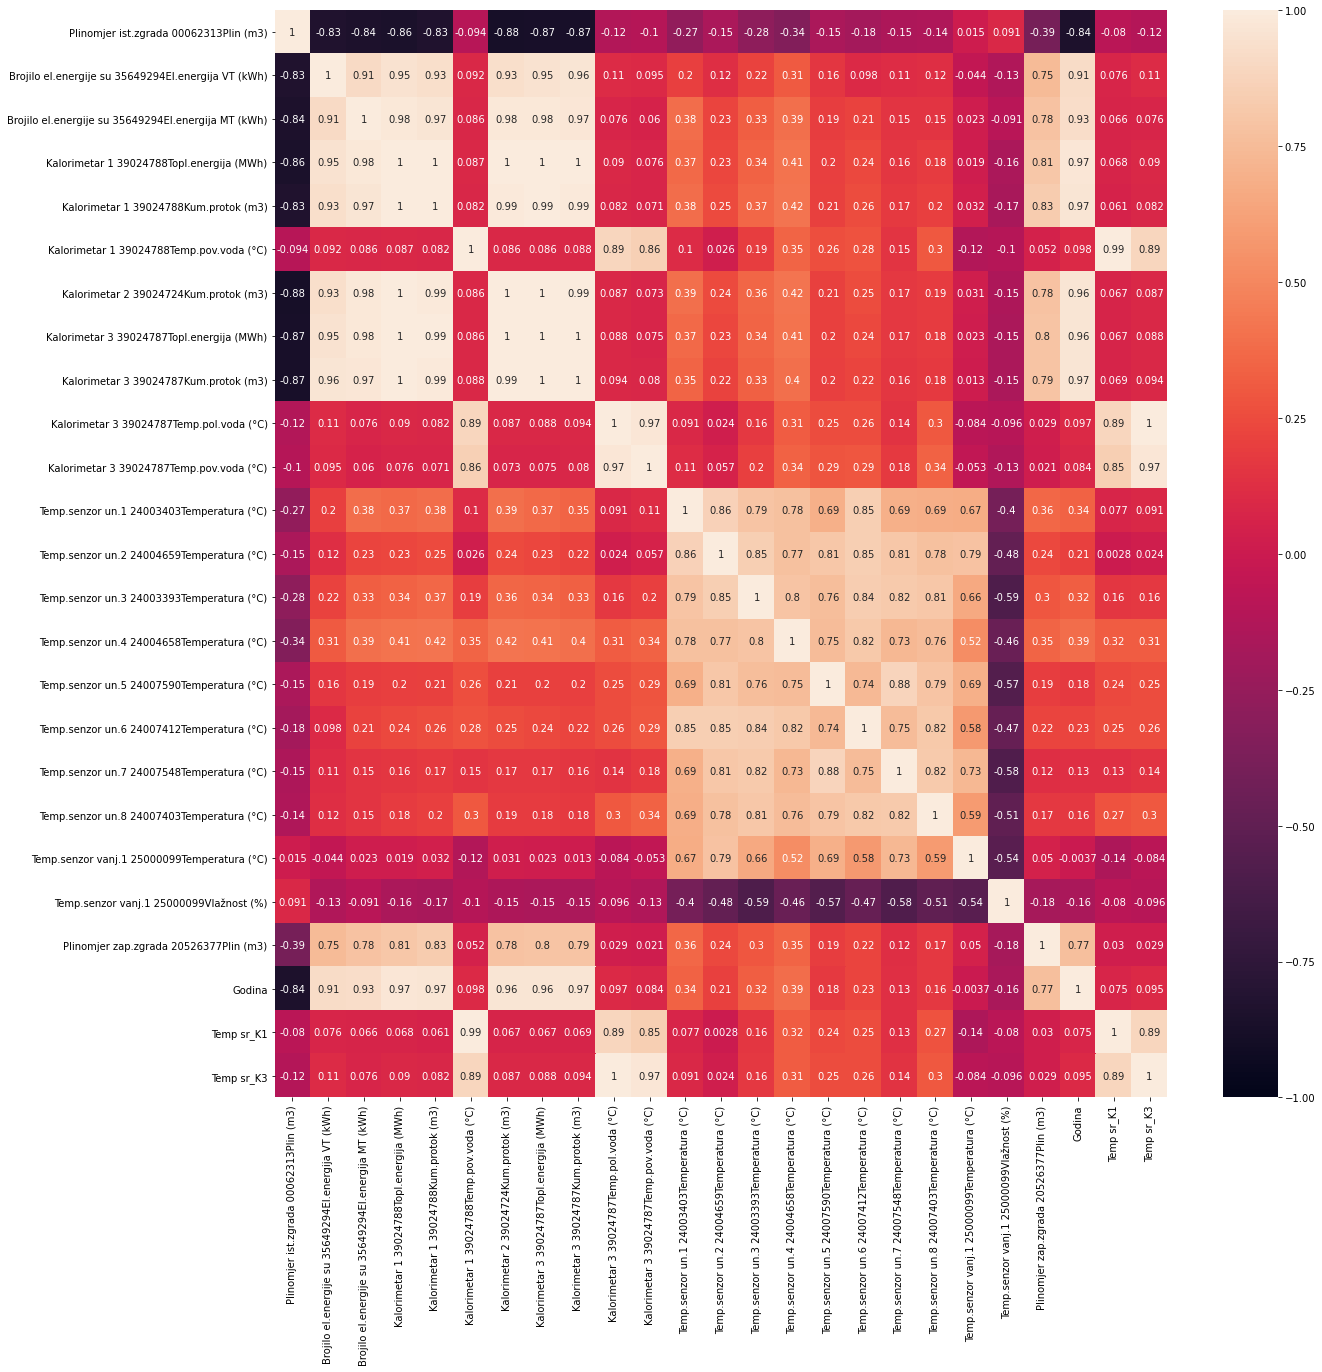

In [371]:
%matplotlib inline
plt.figure(figsize=(20,20))
sns.heatmap(file2.corr(),annot=True, vmin=-1, vmax=1)
plt.show()

In [376]:
file3=file2[['Temp.senzor un.6 24007412Temperatura (°C)','Temp.senzor un.4 24004658Temperatura (°C)','Kalorimetar 1 39024788Kum.protok (m3)',
       'Kalorimetar 1 39024788Temp.pov.voda (°C)']]#'Plinomjer ist.zgrada 00062313Plin (m3)'
series=['Temp.senzor un.6 24007412Temperatura (°C)','Temp.senzor un.4 24004658Temperatura (°C)','Kalorimetar 1 39024788Kum.protok (m3)',
       'Kalorimetar 1 39024788Temp.pov.voda (°C)']#'Plinomjer ist.zgrada 00062313Plin (m3)'

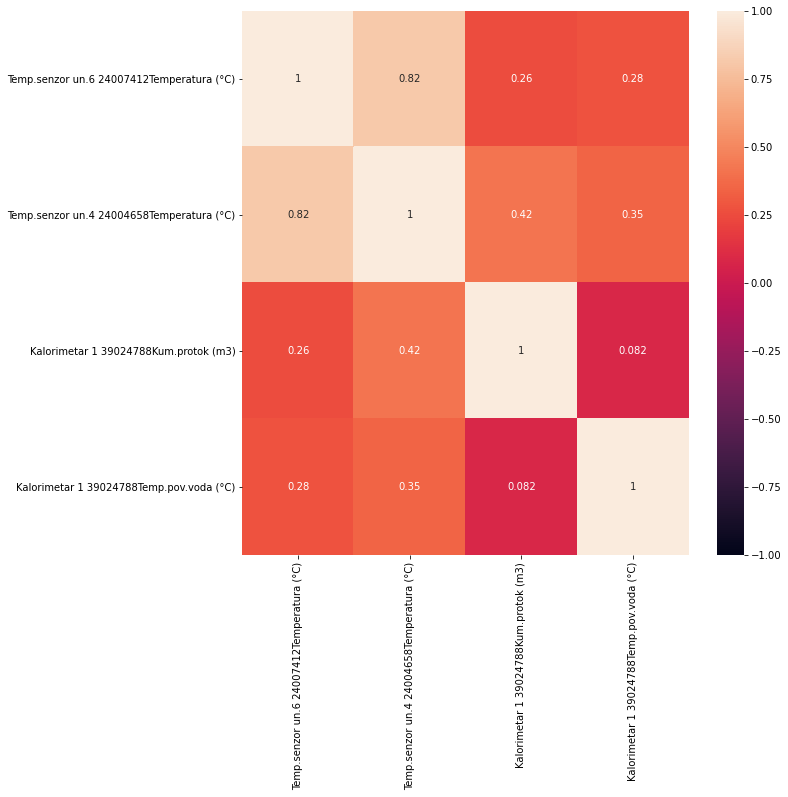

In [378]:
%matplotlib inline
plt.figure(figsize=(10,10))
sns.heatmap(file3.corr(),annot=True, vmin=-1, vmax=1)
plt.show()

In [379]:

for col in file.columns[1:39]:
    t1=S1[col].shift(1)
    t2=S2[col].shift(1)
    t3=S3[col].shift(1)
    t_prior=np.concatenate([t1,t2,t3])
    file[col+" (t-1)"]=t_prior

In [380]:
file.head()

Datum i vrijeme  Plinomjer ist.zgrada 00062313Plin (m3)  \
0 2015-10-01 00:00:00                               3009985.0   
1 2015-10-01 01:00:00                               3009985.0   
2 2015-10-01 02:00:00                               3009985.0   
3 2015-10-01 03:00:00                               3009985.0   
4 2015-10-01 04:00:00                               3009985.0   

   Brojilo el.energije su 35649294El.energija VT (kWh)  \
0                                          371651.16     
1                                          371651.16     
2                                          371651.16     
3                                          371651.16     
4                                          371651.16     

   Brojilo el.energije su 35649294El.energija MT (kWh)  \
0                                          230421.12     
1                                          230427.44     
2                                          230433.52     
3                                          230440.12     
4                                          230446.64     

   Kalorimetar 1 39024788Topl.energija (MWh)  \
0                                    1349.61   
1                                    1349.61   
2                                    1349.61   
3                                    1349.61   
4                                    1349.61   

   Kalorimetar 1 39024788Kum.protok (m3)  \
0                               322693.0   
1                               322693.0   
2                               322693.0   
3                               322693.0   
4                               322693.0   

   Kalorimetar 1 39024788Tren.protok (m3/h)  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   

   Kalorimetar 1 39024788Temp.pol.voda (°C)  \
0                                      18.3   
1                                      18.3   
2                                      18.3   
3                                      18.2   
4                                      18.1   

   Kalorimetar 1 39024788Temp.pov.voda (°C)  \
0                                      19.5   
1                                      19.4   
2                                      19.3   
3                                      19.2   
4                                      19.1   

   Kalorimetar 2 39024724Kum.protok (m3)  ...  \
0                               674383.0  ...   
1                               674383.0  ...   
2                               674383.0  ...   
3                               674384.0  ...   
4                               674384.0  ...   

   Temp.senzor un.8 24007403Vlažnost (%) (t-1)  \
0                                          NaN   
1                                        44.52   
2                                        44.38   
3                                        44.31   
4                                        44.23   

   Temp.senzor vanj.1 25000099Temperatura (°C) (t-1)  \
0                                                NaN   
1                                              11.14   
2                                              11.12   
3                                              10.88   
4                                              10.86   

   Temp.senzor vanj.1 25000099Vlažnost (%) (t-1)  \
0                                            NaN   
1                                          80.24   
2                                          79.87   
3                                          83.93   
4                                          83.88   

   Plinomjer zap.zgrada 20526377Plin (m3) (t-1)  Sat (t-1)  \
0                                           NaN        NaN   
1                                       85344.0        0.0   
2                                       85344.0        1.0   
3                   

In [389]:
file.columns

Index(['Datum i vrijeme', 'Plinomjer ist.zgrada 00062313Plin (m3)',
       'Brojilo el.energije su 35649294El.energija VT (kWh)',
       'Brojilo el.energije su 35649294El.energija MT (kWh)',
       'Kalorimetar 1 39024788Topl.energija (MWh)',
       'Kalorimetar 1 39024788Kum.protok (m3)',
       'Kalorimetar 1 39024788Tren.protok (m3/h)',
       'Kalorimetar 1 39024788Temp.pol.voda (°C)',
       'Kalorimetar 1 39024788Temp.pov.voda (°C)',
       'Kalorimetar 2 39024724Kum.protok (m3)',
       'Kalorimetar 2 39024724Tren.protok (m3/h)',
       'Kalorimetar 3 39024787Topl.energija (MWh)',
       'Kalorimetar 3 39024787Kum.protok (m3)',
       'Kalorimetar 3 39024787Tren.protok (m3/h)',
       'Kalorimetar 3 39024787Temp.pol.voda (°C)',
       'Kalorimetar 3 39024787Temp.pov.voda (°C)',
       'Temp.senzor un.1 24003403Temperatura (°C)',
       'Temp.senzor un.1 24003403Vlažnost (%)',
       'Temp.senzor un.2 24004659Temperatura (°C)',
       'Temp.senzor un.2 24004659Vlažnost (%)',
   

In [381]:
indices_working=[]
for j in range (5):
    b=[list(file["Sat"].loc[(file["Sat"]==i)&(file["Dan u sedmici"]==j)].index) for i in range(9,18,1)]
    indices_working.append(b)

In [382]:
holiday=["2015-11-25","2015-12-25","2016-11-25","2016-17-25","2016-12-25","2017-12-25","2016-01-01",
        "2016-01-02","2017-01-01",
        "2017-01-02","2018-01-01",
        "2018-01-02","2016-01-07","2017-01-07","2018-01-07","2016-05-01","2016-05-02","2016-03-01","2017-03-01","2018-03-01"
        "2016-03-27","2016-04-30","2017-04-16","2018-04-01","2018-04-08"]

In [383]:
file["Praznik"]=0
indices_holiday=[]
for value in holiday:
    c=list((file["Datum i vrijeme"].loc[file["Datum i vrijeme"].dt.date.astype(str).str.contains(value)].index.values)) 
    for k in c:
        file["Praznik"].values[k]=1

In [384]:
file["Radni sati"]=0
for j in range (5):
    b=[list(file["Sat"].loc[(file["Sat"]==i)&(file["Dan u sedmici"]==j)].index) for i in range(9,18,1)]
    for k in b:
        file["Radni sati"].values[k]=1

In [385]:
#from pandas.plotting import autocorrelation_plot
#f, ax = plt.subplots(nrows=2, ncols=1, figsize=(20, 20))
#for i,column in enumerate(series):
 #   autocorrelation_plot(file3[column])
#plt.show()


In [386]:
#from statsmodels.tsa.stattools import adfuller
#for column in series:
 #   result = adfuller(filex[column].values)
  #  print(column,":", result)

In [387]:
    #from statsmodels.graphics.tsaplots import plot_acf
    #from statsmodels.graphics.tsaplots import plot_pacf

   # f, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))
   # for i,column in enumerate(series):
        #plot_acf(filex["Kalorimetar 1 39024788Temp.pol.voda (°C)"], lags=24, ax=ax[0])
        #plot_pacf(filex["Kalorimetar 1 39024788Temp.pol.voda (°C)"], lags=24, ax=ax[1])

   # plt.show()

In [388]:
file.to_excel("Merged files_1.xlsx", index=False)#manually modified and saved as Merged files_2)

In [ ]:
#create shift features

In [ ]:
nan_values = df[df['first_set'].isna()]

print (nan_values)
